# Busqueda por Costo

A continuacion se ejemplifica la busqueda por costo revisada en clase. Para ello se tiene un ejemplo de las ciudades del territorio Ecuatoriano y su distancia.


In [33]:
# Busqueda por costo.

# Creamos la clase Nodo
class Node:
    def __init__(self, data, child=None): # Constructor de la clase
        self.data = data
        self.child = None
        self.fathr = None
        self.cost = None # Importante tener el costo de recorer el nodo
        self.set_child(child)

    def set_child(self, child): # Agregar hijos
        self.child = child
        if self.child is not None:
            for ch in self.child:
                ch.fathr = self
            
    def equal(self, node):
        if self.data == node.data:
            return True
        else:
            return False

    def on_list(self, node_list): # Verfiicar su el nodo esta en la lista
        listed = False
        for n in node_list:
            if self.equal(n):
                listed = True
        return listed

    def __str__(self): # Igual al toString Java
        return str(self.data)
    
    

In [34]:
#Definimos una funcion para obtener el costo - CompareTo (Java)
def Compare(node):
    return node.cost

In [21]:
# Implementacion del metodo de busqueda por costo
def search_costo_solucion(connections, init_state, solution):
    solved = False # Variable para almacenar el estado de la busqueda
    visited_nodes = [] # Nodos visitados
    frontier_nodes = [] # Nodos en busqueda o lista nodos o nodos por visitar

    init_node = Node(init_state) # Nodo inicial
    init_node.cost =0 # Agregar costo inicial
    frontier_nodes.append(init_node)
    while (not solved) and len(frontier_nodes) != 0:
        frontier_nodes = sorted(frontier_nodes, key=Compare) # Ordenar lista de nodos 
        node = frontier_nodes[0]
        visited_nodes.append(frontier_nodes.pop(0)) # Extraer nodo y añadirlo a visitados
        if node.data == solution:# Solucion encontrada
            solved = True
            return node
        else:
            node_data = node.data# Expandir nodos hijo (ciudades con conexion)
            child_list = []
            for achild in connections[node_data]: # Recorrera cada uno de los nodos hijos
                child = Node(achild)
                cost = connections[node_data][achild] # Obtener el costo del nodo
                child.cost = node.cost + cost # Agregamos el costo actual del nodo + el historial
                child_list.append(child)
                if not child.on_list(visited_nodes):
                    if child.on_list(frontier_nodes): # Si está en la lista lo sustituimos con el nuevo valor de coste si es menor
                        for n in frontier_nodes:
                            if n.equal(child) and n.cost > child.cost:
                                frontier_nodes.remove(n)
                                frontier_nodes.append(child)
                    else:
                        frontier_nodes.append(child)
            node.set_child(child_list)

if __name__ == "__main__":
    connections = {
        'Cuenca': {'Riobamba':190, 'Quito':280, 'Guayaquil':170},
        'Latacunga': {'Ambato':50, 'Quito':30},
        'Esmeraldas': {'Manta':80},
        'Manta': {'Guayaquil':60},
        'Quito': {'Riobamba':110, 'Latacunga':30, 'Cuenca':280, 'Guayaquil':190, 'Puyo':170},
        'Riobamba': {'Cuenca':190, 'Quito':110},
        'Ambato': {'Latacunga':50, 'Puyo':80, 'Guayaquil':230},
        'Puyo': {'Ambato':60, 'Quito':170},
        'Machala': {'Guayaquil':80},
        'Guayaquil': {'Machala':80, 'Ambato':230, 'Quito':190, 'Cuenca':170, 'Manta':60}
    }

    init_state = 'Quito'
    solution = 'Puyo'
    solution_node = search_costo_solucion(connections, init_state, solution)
    # mostrar resultado
    result = []
    node = solution_node
    if node is not None: 
        while node.fathr is not None:
            result.append(node.data)
            node = node.fathr
        result.append(init_state)
        result.reverse() # Reverso el resultado (Solo para presentar)
        print(result)
        print("Costo total: %s" % str(solution_node.cost)) # Imprimir el costo total de llegar al nodo
    else:
        print("No hay solucion !!!!")

['Quito', 'Latacunga', 'Ambato', 'Puyo']
Costo total: 160


## Practica

Implementar un algoritmo que me permita dibujar las conexiones con los costos y los resultados del grafo.

Mediante el uso de la herramienta de Google Maps tomar al su direccion domiciliaria como punto de partida y generar un arbol jerarquico con todos los posibles Policia/UPC/Funcion Judicial, para ello se debe tener como primer nivel los mas cercanos y a continuacion los demas generando un arbol jerarquico.


Realizar los calculos para obtener el factor de ramificacion, análisis del algoritmo en términos de completitud, optimalidad, complejidad temporal y complejidad espacial.


Subir el cuaderno con la resolucion

Generar un arbol de expansion del COVID-19 en el Ecuador y agregarle al metodo de costo para obtener la ruta de contagio.


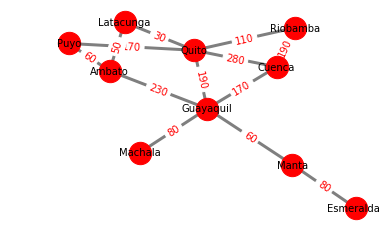

In [143]:
#Grafo Ciudades

G = nx.Graph()
G.add_edge("Cuenca", "Riobamba", weight = 5 ,label='190')
G.add_edge("Cuenca", "Quito", weight = 5,label ='280')
G.add_edge("Cuenca", "Guayaquil", weight = 5,label ='170')

G.add_edge("Latacunga", "Ambato", weight = 5,label ='50')
G.add_edge("Latacunga", "Quito", weight = 5,label ='30')

G.add_edge("Esmeraldas","Manta", weight = 5,label ='80')

G.add_edge("Manta", "Guayaquil", weight = 5,label ='60')

G.add_edge("Quito", "Riobamba", weight = 5,label ='110')
G.add_edge("Quito", "Guayaquil", weight = 5,label ='190')
G.add_edge("Quito", "Puyo", weight = 5,label ='170')

G.add_edge("Puyo", "Ambato", weight = 5,label ='60')

G.add_edge("Machala", "Guayaquil", weight = 5,label ='80')

G.add_edge("Guayaquil", "Machala", weight = 5,label ='80')
G.add_edge("Guayaquil", "Ambato", weight = 5,label ='230')


weights = [G[u][v]['weight'] for u,v in G.edges()]
etiquetas = [G[u][v]['label'] for u,v in G.edges()]
pos =nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=500) #nodos
nx.draw_networkx_edges(G, pos, width=3, alpha=0.5, edge_color='black')
nx.draw_networkx_edge_labels(G,pos,edge_labels={(u,v):G[u][v]['label'] for u,v in
G.edges()} ,font_color='red')
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif') #etiquetas
plt.axis('off')
plt.show()

['Bolivia Zhalaou', 'Comando de Policia del Cañar', 'Fiscalia Provincial del Cañar']
Costo total: 3.5 KM


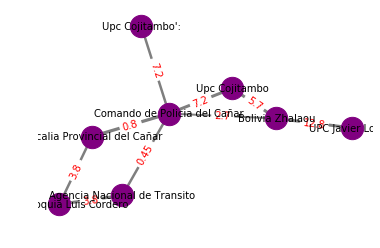

In [222]:
# Implementar

# Arbol Jerarquico Policias

# Creamos la clase Nodo
import networkx as nx
import matplotlib.pyplot as plt

class Node:
    def __init__(self, data, child=None): # Constructor de la clase
        self.data = data
        self.child = None
        self.fathr = None
        self.cost = None # Importante tener el costo de recorer el nodo
        self.set_child(child)

    def set_child(self, child): # Agregar hijos
        self.child = child
        if self.child is not None:
            for ch in self.child:
                ch.fathr = self
            
    def equal(self, node):
        if self.data == node.data:
            return True
        else:
            return False

    def on_list(self, node_list): # Verfiicar su el nodo esta en la lista
        listed = False
        for n in node_list:
            if self.equal(n):
                listed = True
        return listed

    def __str__(self): # Igual al toString Java
        return str(self.data)
#Definimos una funcion para obtener el costo - CompareTo (Java)
def Compare(node):
    return node.cost
# Implementacion del metodo de busqueda por costo
def search_costo_solucion(connections, init_state, solution):
    solved = False # Variable para almacenar el estado de la busqueda
    visited_nodes = [] # Nodos visitados
    frontier_nodes = [] # Nodos en busqueda o lista nodos o nodos por visitar

    init_node = Node(init_state) # Nodo inicial
    init_node.cost =0 # Agregar costo inicial
    frontier_nodes.append(init_node)
    while (not solved) and len(frontier_nodes) != 0:
        frontier_nodes = sorted(frontier_nodes, key=Compare) # Ordenar lista de nodos 
        node = frontier_nodes[0]
        visited_nodes.append(frontier_nodes.pop(0)) # Extraer nodo y añadirlo a visitados
        if node.data == solution:# Solucion encontrada
            solved = True
            return node
        else:
            node_data = node.data# Expandir nodos hijo (ciudades con conexion)
            child_list = []
            for achild in connections[node_data]: # Recorrera cada uno de los nodos hijos
                child = Node(achild)
                cost = connections[node_data][achild] # Obtener el costo del nodo
                child.cost = node.cost + cost # Agregamos el costo actual del nodo + el historial
                child_list.append(child)
                if not child.on_list(visited_nodes):
                    if child.on_list(frontier_nodes): # Si está en la lista lo sustituimos con el nuevo valor de coste si es menor
                        for n in frontier_nodes:
                            if n.equal(child) and n.cost > child.cost:
                                frontier_nodes.remove(n)
                                frontier_nodes.append(child)
                    else:
                        frontier_nodes.append(child)
            node.set_child(child_list)

if __name__ == "__main__":
    connections = {
        'Bolivia Zhalaou': {'Upc Cojitambo':5.7, 'Comando de Policia del Cañar':2.7},
        'Agencia Nacional de Transito': {'UPC Parroquia Luis Cordero':3.8, 'Comando de Policia del Cañar':0.45 },
        'Comando de Policia del Cañar': {'UPC Cojitambo':7.2, 'Agencia Nacional de Transito':0.45, 'Bolivia Zhalaou':2.7, 'Fiscalia Provincial del Cañar':0.8 },
        'UPC Cojitambo': {'Bolivia Zhalaou':5.7, 'UPC Javier Loyola':6.8},
        'UPC Javier Loyola':{'UPC Cojitambo':6.8},
        'UPC Parroquia Luis Cordero': {'Agencia Nacional de Transito':3.8, 'Fiscalia Provincial del Cañar':3.8 },
        'Fiscalia Provincial del Cañar': {'UPC Parroquia Luis Cordero':3.8, 'Comando de Policia del Cañar':0.8},
 
    }

    init_state = 'Bolivia Zhalaou'
    solution = 'Fiscalia Provincial del Cañar'
    solution_node = search_costo_solucion(connections, init_state, solution)
    # mostrar resultado
    result = []
    node = solution_node
    if node is not None: 
        while node.fathr is not None:
            result.append(node.data)
            node = node.fathr
        result.append(init_state)
        result.reverse() # Reverso el resultado (Solo para presentar)
        print(result)
        print("Costo total: %s" % str(solution_node.cost) + " KM") # Imprimir el costo total de llegar al nodo
    else:
        print("No hay solucion !!!!")

        #************************************************************************************************
G = nx.Graph()


G.add_edge("Bolivia Zhalaou", "Upc Cojitambo", weight = 3,label='5.7')
G.add_edge("Bolivia Zhalaou", "Comando de Policia del Cañar", weight = 2.5,label ='2.7')
G.add_edge("Agencia Nacional de Transito", "UPC Parroquia Luis Cordero", weight = 2.0,label ='3.8')
G.add_edge("Agencia Nacional de Transito", "Comando de Policia del Cañar", weight = 3.2,label ='0.45')

G.add_edge("Comando de Policia del Cañar", "Upc Cojitambo", weight = 3,label ='7.2')
G.add_edge("Comando de Policia del Cañar", "Agencia Nacional de Transito", weight = 2.5,label ='0.45')
G.add_edge("Comando de Policia del Cañar", "Bolivia Zhalaou", weight = 2.0, label ='2.7')
G.add_edge("Comando de Policia del Cañar", "Fiscalia Provincial del Cañar", weight = 3.2, label ='0.8')

G.add_edge("UPC Javier Loyola", "Bolivia Zhalaou", weight = 3,label ='12.8')
G.add_edge("Upc Cojitambo':", "Comando de Policia del Cañar", weight =2.5,label ='7.2')

G.add_edge("Fiscalia Provincial del Cañar", "UPC Parroquia Luis Cordero", weight = 2.0,label ='3.8')
G.add_edge("Fiscalia Provincial del Cañar", "Comando de Policia del Cañar", weight = 3.2,label ='0.8')
G.add_edge("UPC Parroquia Luis Cordero", "Agencia Nacional de Transito", weight = 3,label ='3.8')
G.add_edge("UPC Parroquia Luis Cordero", "Fiscalia Provincial del Cañar", weight = 2.5,label ='3.8')

weights = [G[u][v]['weight'] for u,v in G.edges()]
etiquetas = [G[u][v]['label'] for u,v in G.edges()]

pos =nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='purple') #nodos
nx.draw_networkx_edges(G, pos, width=weights, alpha=0.5, edge_color='black') 
nx.draw_networkx_edge_labels(G,pos,edge_labels={(u,v):G[u][v]['label'] for u,v in G.edges()} ,font_color='red')


nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif') #etiquetas
plt.axis('off')

plt.show()

## Resolucion de calculos
**n= 2**

**d= 5**
 
**Calculo**

5/2=2.5

 ##### Completitud
*Se puede decir que el algoritmo es completo ya que busca desde la raiz la ruta de menor costo, hasta allar la solucion
 ##### optimalidad
*Es optimo porque retorna la ruta con costo menor.
  
 ##### Complejidad temporal

\begin{equation*}
O =
\frac{(b^{n})}{}
\end{equation*}

\begin{equation*}
O =
\frac{(2.5^{2})}{ } {= 6.25}
\end{equation*}

  
 ##### Complejidad espacial
 
\begin{equation*}
O =
\frac{(b {}*n)}{} { = 2 *2}
\end{equation*}


\begin{equation*}
O =
\frac{}{} { 4}
\end{equation*}

['Sucumbios', 'Morona Santiago', 'Chimborazo', 'Zamora', 'Azuay']
Costo total: 316  Infectados


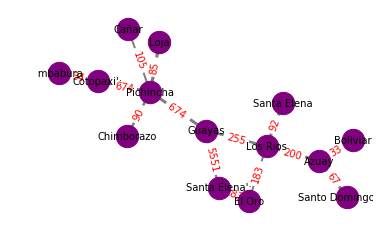

In [243]:
#Covid 19

# Creamos la clase Nodo
import networkx as nx
import matplotlib.pyplot as plt

class Node:
    def __init__(self, data, child=None): # Constructor de la clase
        self.data = data
        self.child = None
        self.fathr = None
        self.cost = None # Importante tener el costo de recorer el nodo
        self.set_child(child)

    def set_child(self, child): # Agregar hijos
        self.child = child
        if self.child is not None:
            for ch in self.child:
                ch.fathr = self
            
    def equal(self, node):
        if self.data == node.data:
            return True
        else:
            return False

    def on_list(self, node_list): # Verfiicar su el nodo esta en la lista
        listed = False
        for n in node_list:
            if self.equal(n):
                listed = True
        return listed

    def __str__(self): # Igual al toString Java
        return str(self.data)
#Definimos una funcion para obtener el costo - CompareTo (Java)
def Compare(node):
    return node.cost
# Implementacion del metodo de busqueda por costo
def search_costo_solucion(connections, init_state, solution):
    solved = False # Variable para almacenar el estado de la busqueda
    visited_nodes = [] # Nodos visitados
    frontier_nodes = [] # Nodos en busqueda o lista nodos o nodos por visitar

    init_node = Node(init_state) # Nodo inicial
    init_node.cost =0 # Agregar costo inicial
    frontier_nodes.append(init_node)
    while (not solved) and len(frontier_nodes) != 0:
        frontier_nodes = sorted(frontier_nodes, key=Compare) # Ordenar lista de nodos 
        node = frontier_nodes[0]
        visited_nodes.append(frontier_nodes.pop(0)) # Extraer nodo y añadirlo a visitados
        if node.data == solution:# Solucion encontrada
            solved = True
            return node
        else:
            node_data = node.data# Expandir nodos hijo (ciudades con conexion)
            child_list = []
            for achild in connections[node_data]: # Recorrera cada uno de los nodos hijos
                child = Node(achild)
                cost = connections[node_data][achild] # Obtener el costo del nodo
                child.cost = node.cost + cost # Agregamos el costo actual del nodo + el historial
                child_list.append(child)
                if not child.on_list(visited_nodes):
                    if child.on_list(frontier_nodes): # Si está en la lista lo sustituimos con el nuevo valor de coste si es menor
                        for n in frontier_nodes:
                            if n.equal(child) and n.cost > child.cost:
                                frontier_nodes.remove(n)
                                frontier_nodes.append(child)
                    else:
                        frontier_nodes.append(child)
            node.set_child(child_list)

if __name__ == "__main__":
    connections = {
        
        'Guayas':{'Pichincha':674,'Los Rios':255},
        'Los Rios':{'Manabi':227,'El Oro':183,'Santa Elena':92,'Azuay':200},
        'Pichincha':{'Chimborazo':90,'Cañar':105,'Loja':85},
        'Azuay':{'Bolivar':33,'Sto.Domingo TsA':67},
        'Cotopaxi':{'Imbabura':34,'Pichincha':674},
        'Santa Elena':{'Guayas':5551,'El Oro':183},
        'Cañar':{'Chimborazo':90,'Azuay':200,'Santa Elena':92},
        'El Oro':{'Los Rios':255,'Azuay':200},
        'Bolivar':{'Azuay':200,'Tunguragua':47,'Morona Santiago':21},
        'Sto.Domingo TsA':{'Bolivar':33,'Orella':6,'Sucumbios':33 },
        'Loja':{'Pichincha':674,'Guayaquil':5551},
        'Chimborazo':{'Cañar':105,'Zamora':5},
        'Zamora':{'Azuay':200,'Loja':85},
        'Orellana':{'Pichincha':183,'Santa Elena':92},
        'Morona Santiago':{'Chimborazo':90,'Los Rios':255},
        'Sucumbios':{'Morona Santiago':21,'Cotopaxi':45},
        'Imbabura':{'Pichincha':183,'Manabi':227},
        'Manabi':{'Santa Elena':92}
        
        
     
        
    }

    init_state = 'Sucumbios'
    solution = 'Azuay'
    solution_node = search_costo_solucion(connections, init_state, solution)
    # mostrar resultado
    result = []
    node = solution_node
    if node is not None: 
        while node.fathr is not None:
            result.append(node.data)
            node = node.fathr
        result.append(init_state)
        result.reverse() # Reverso el resultado (Solo para presentar)
        print(result)
        print("Costo total: %s" % str(solution_node.cost) + "  Infectados") # Imprimir el costo total de llegar al nodo
    else:
        print("No hay solucion !!!!")

        #**********************************************************************
        
    G = nx.Graph()


G.add_edge("Guayas", "Pichincha", weight = 3,label='674 ')
G.add_edge("Guayas", "Los Rios", weight = 2.5,label ='255')
G.add_edge("Los Rios", "El Oro", weight = 2.0,label ='183')
G.add_edge("Los Rios", "Santa Elena", weight = 3.2,label ='92')
G.add_edge("Los Rios", "Azuay", weight = 3,label ='200')
G.add_edge("Pichincha", "Chimborazo", weight = 2.5,label ='90')
G.add_edge("Pichincha", "Cañar", weight = 2.0, label ='105')
G.add_edge("Pichincha", "Loja", weight = 3.2, label ='85')
G.add_edge("Azuay", "Boliviar", weight = 3,label ='33')
G.add_edge("Azuay", "Santo Domingo TsA", weight = 3,label ='67')
G.add_edge("Cotopaxi':", "Imbabura", weight =2.5,label ='34')
G.add_edge("Cotopaxi':", "Pichincha", weight =2.5,label ='674')
G.add_edge("Santa Elena':", "Guayas", weight =2.5,label ='5551')
G.add_edge("Santa Elena':", "El Oro", weight =2.5,label ='183')

weights = [G[u][v]['weight'] for u,v in G.edges()]
etiquetas = [G[u][v]['label'] for u,v in G.edges()]

pos =nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='purple') #nodos
nx.draw_networkx_edges(G, pos, width=weights, alpha=0.5, edge_color='black') 
nx.draw_networkx_edge_labels(G,pos,edge_labels={(u,v):G[u][v]['label'] for u,v in G.edges()} ,font_color='red')


nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif') #etiquetas
plt.axis('off')

plt.show()

# Conclusiones

Podemos concluir que esta busqueda es un metodo, su solucion consiste en una serie de pasos que determinan una alternativa.